In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Disable warnings (annoying ones)
import warnings
warnings.simplefilter('ignore')

In [3]:
# Display plots right inside Jupyter, because otherwise 1/2 of plots are nowhere
%matplotlib inline

In [4]:
#Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format='svg'

In [5]:
# Change default plot size
from pylab import rcParams
rcParams['figure.figsize']=5,4

In [6]:
df=pd.read_csv(r'C:\Users\eldiy\Documents\GitHub\My own labs\mlcourse.ai\data\telecom_churn.csv')

In [7]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [8]:
df.shape

(3333, 20)

# Univariate visualization

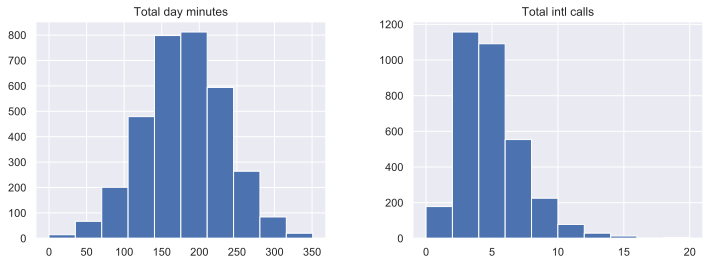

In [12]:
features=['Total day minutes','Total intl calls']
df[features].hist(figsize=(12,4));

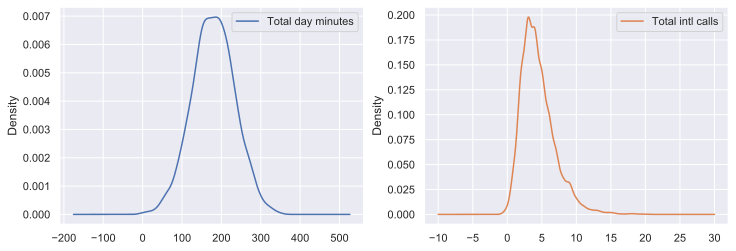

In [24]:
df[features].plot(kind='density',subplots=True, layout=(1,2), figsize=(12,4), sharex=False);

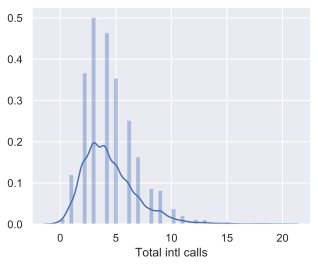

In [33]:
sns.distplot(df['Total intl calls']);

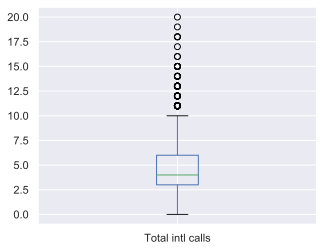

In [36]:
df['Total intl calls'].plot.box()

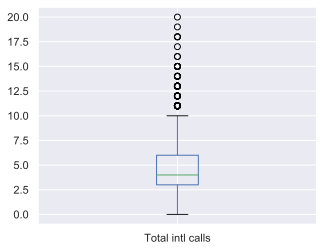

In [38]:
df['Total intl calls'].plot(kind='box')

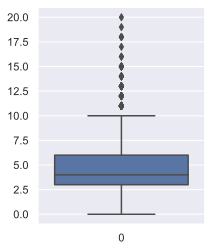

In [46]:
_, ax=plt.subplots(figsize=(3,4))
sns.boxplot(data=df['Total intl calls'], ax=ax);

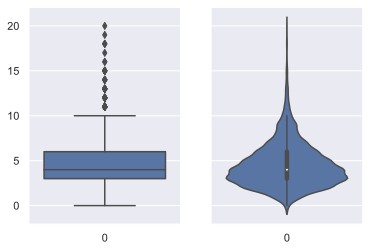

In [50]:
_, axes=plt.subplots(1,2,sharey=True,figsize=(6,4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [52]:
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

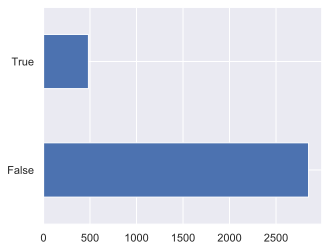

In [57]:
df.Churn.value_counts().plot.barh();

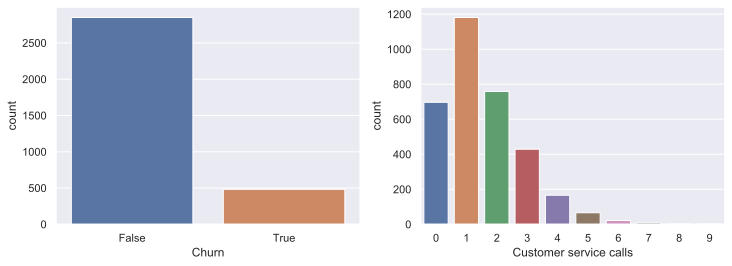

In [59]:
_,axes=plt.subplots(nrows=1,ncols=2, figsize=(12,4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls',data=df, ax=axes[1]);


# Multivariate visualization

## Quantitative-Quantitative

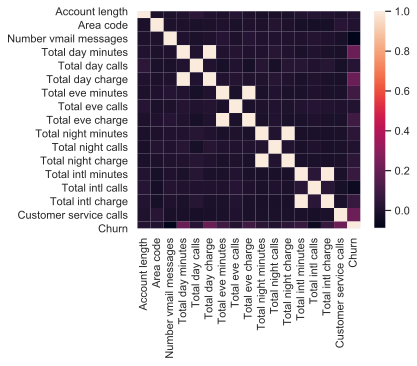

In [69]:
sns.heatmap(df.corr())

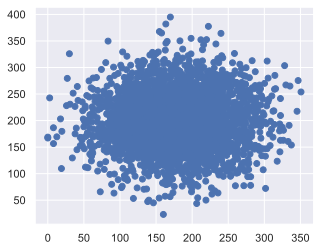

In [70]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

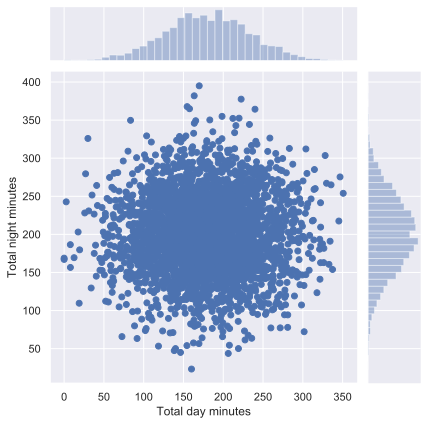

In [73]:
sns.jointplot(df['Total day minutes'], df['Total night minutes']);

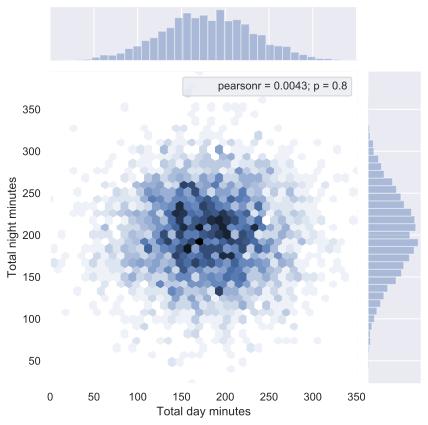

In [77]:
import scipy.stats as scs
sns.jointplot(df['Total day minutes'], df['Total night minutes'], kind='hex').annotate(scs.pearsonr)

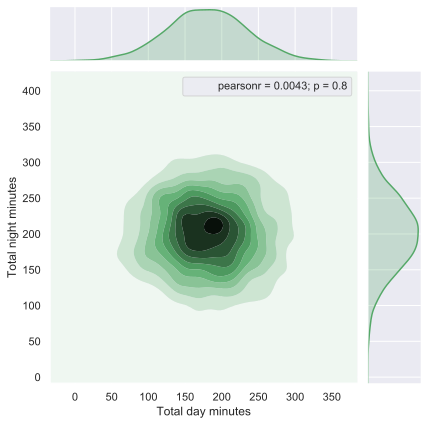

In [78]:
sns.jointplot(df['Total day minutes'], df['Total night minutes'], kind='kde', color='g').annotate(scs.pearsonr);

## Quantitative-Categorical

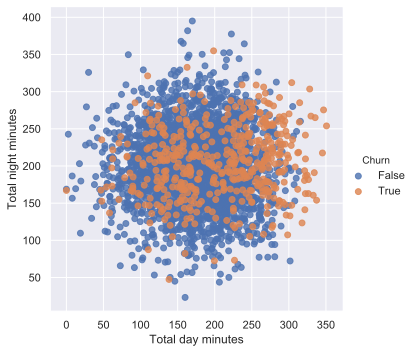

In [81]:
sns.lmplot(x='Total day minutes',y='Total night minutes', data=df, hue='Churn', fit_reg=False);

In [82]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [91]:
numerical=list(set(df._get_numeric_data().columns)-set(['Area code','Churn']))

In [93]:
len(numerical)

15

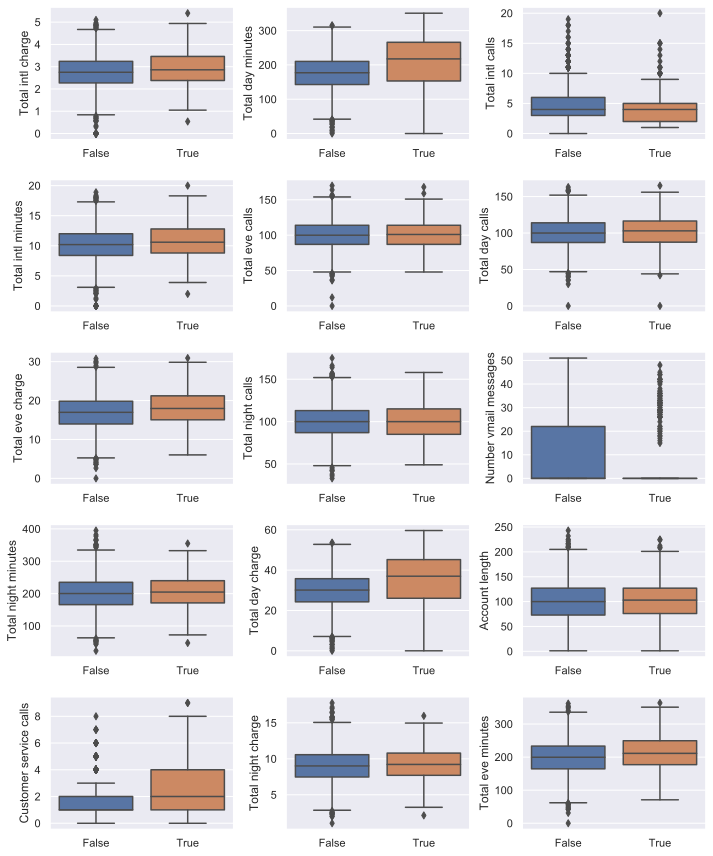

In [97]:
fig, axes=plt.subplots(nrows=5, ncols=3, figsize=(10,12))

for idx, feat in enumerate(numerical):
    ax=axes[int(idx/3), idx%3]
    sns.boxplot(x='Churn',y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

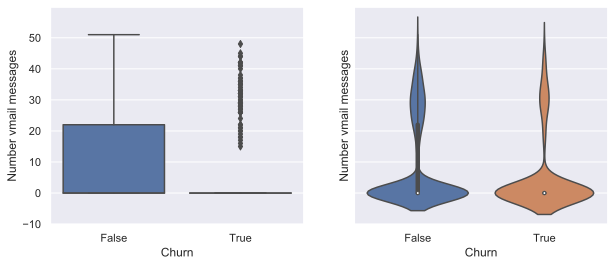

In [98]:
_, axes=plt.subplots(1,2, sharey=True, figsize=(10,4))
sns.boxplot(x='Churn', y='Number vmail messages', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Number vmail messages', data=df, ax=axes[1]);

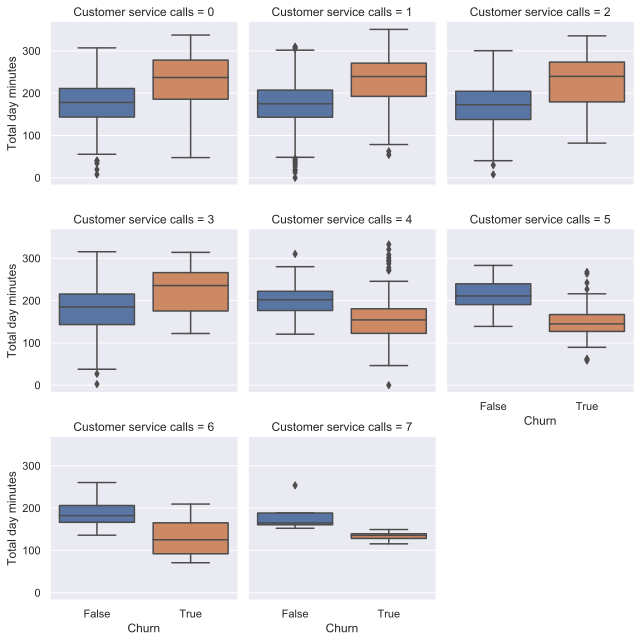

In [103]:
sns.factorplot(x='Churn', y='Total day minutes', col='Customer service calls', 
               data=df[df['Customer service calls']<8], kind='box',
              col_wrap=3, size=3);

## Categorical - Categorical

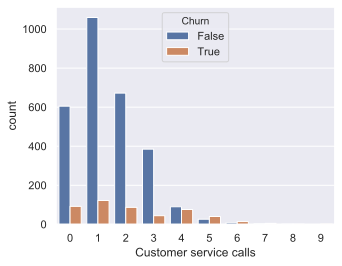

In [104]:
sns.countplot(x='Customer service calls',hue='Churn', data=df)

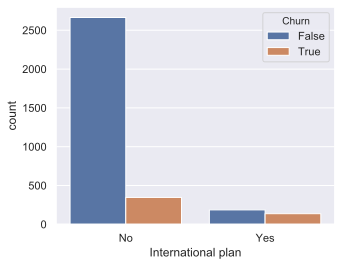

In [105]:
sns.countplot(x='International plan',hue='Churn', data=df)

In [107]:
pd.crosstab(df.State, df.Churn).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [109]:
df_ct=pd.crosstab(df.State, df.Churn)

In [122]:
df_ct[True]/df_ct.sum(axis=1);

In [124]:
df.groupby(['State'])['Churn'].agg('mean');

In [128]:
df.groupby(['State'])['Churn'].agg('mean').sort_values(ascending=False).head(5)

State
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
Name: Churn, dtype: float64

In [129]:
df.groupby(['State'])['Churn'].agg('mean').sort_values(ascending=True).head(5)

State
HI    0.056604
AK    0.057692
AZ    0.062500
VA    0.064935
IA    0.068182
Name: Churn, dtype: float64

In [130]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [131]:
X=df.drop(['Churn','State'],axis=1)
X['Voice mail plan']=X['Voice mail plan'].map({'Yes':1,'No':0})
X['International plan']=X['International plan'].map({'Yes':1,'No':0})

In [133]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Wall time: 0 ns


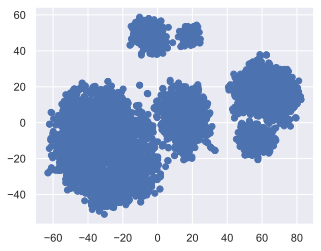

In [135]:
tsne = TSNE(random_state=42)
tsne_repr=tsne.fit_transform(X_scaled)

plt.scatter(tsne_repr[:,0],tsne_repr[:,1]);

In [136]:
tsne_repr

array([[ 54.095154 ,  28.576202 ],
       [ 77.643196 ,  20.641657 ],
       [-37.708843 , -36.174553 ],
       ...,
       [ 19.977797 ,  12.415446 ],
       [  1.8993701,  41.45819  ],
       [ 52.809074 ,  25.114136 ]], dtype=float32)

In [137]:
X_scaled

array([[ 0.67648946, -0.52360328, -0.32758048, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.14906505, -0.52360328, -0.32758048, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.9025285 , -0.52360328, -0.32758048, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [-1.83505538,  1.71881732, -0.32758048, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 2.08295458,  1.71881732,  3.05268496, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.67974475, -0.52360328, -0.32758048, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

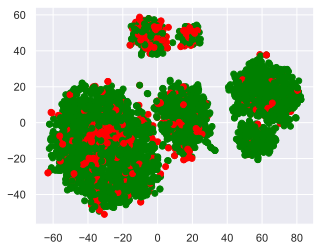

In [138]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1], c=df['Churn'].map({False:'green',True:'red'}));

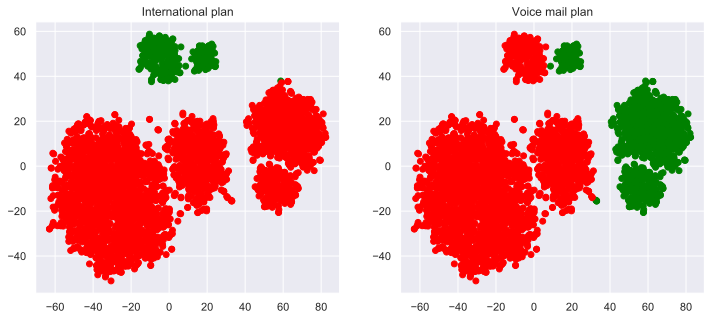

In [141]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'green', 'No': 'red'}))
    axes[i].set_title(name)